# Credit Scoring - default prediction among credit card holders in Python
# Author: Adrian Żelazek

# Table of contenets<br>
Introduction<br>
1. Librarires <br>
2. Dataset<br>
3. Explotarion Data Analysis (EDA)<br>
> 3.1 Numerical variables<br>
>3.1.1 Target variable - default<br>
>3.1.2 Credit limit<br>
>3.1.3 Age<br>
>3.1.4 Bill statement<br>
>3.1.5 Payment amount<br>
>>3.2 Categorical variables<br>
>>3.2.1 Sex<br>
>>3.2.2 Education<br>
>>3.2.3 Martial status<br>
4. Correlation analysis<br>
>4.1 Correlation between numerical and target variable - Spearman's correlation coefficient<br>
>4.2 Correlation between cetegorical and target variable - Crammer's V coefficient<br>
>4.3 Correlation between numerical variables - Spearman's correlation coefficient<br>
>4.4 Correlation between categorical variables - Crammer's V coefficient<br>
5. Identifying and removing of outliers - Z-score<br>
6. Dummying<br>
7. Machine Learning Models<br>
>7.1 **Model 1 - Logistic Regression in statsmodels with variables selection based on IV indicator**<br>
>Features selection - Information Value (IV) indicator<br>
>Model building and evaluation<br>
>Interpretation of Model Summary<br>
>Confusion Matrix<br>
>Classification Report and Indicators: Accuracy, Recall, Precision, F1<br>
>Comparison of results on test and train dataset<br>
>Model interpretation<br>
>Interpretation of Odds Ratio<br>
>Interpretation of Marginal Effects<br>
>>**7.2 Model 2 - Logistic Regression in sklearn with forward variables selection**<br>
>>Dataset formatting<br>
>>Features selection - forward selection method<br>
>>Model building<br>
>>Model evaluation<br>
>>Comparison of results on test and train datasets<br>
>>Model interpretation<br>
>>>7.3 **Model 3 - Logistic Regression in sklearn with backward variables selection**<br>
>>>Features selection - backward selection method<br>
>>>Model building<br>
>>>Model evaluation<br>
>>>Comparison of results on test and train datasets<br>
>>>Model interpretation<br>
8. Models comparison<br>
9. Conclusions

## Introduction
<b>Dataset description:</b><br>
The data set concerns the characteristics of the credit card holders and contains 30000 observations as well as 24 variables. The default column contains information on whether the client is good (1) or bad (0).<br>
Source of the dataset: archive.ics.uci.edu<br>
Meaning of variables: <br>
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

<b>Target variable:</b><br>
1 - default<br>
0 - no default (good client) <br>

<b>Problem description:</b><br>
The main target of this project was to build predictive medels to determine the Probability of Default (PD) of clients hold credit card. This project can be called Credit Scoring, although this case is slightly different from the classic definition. To predict the targer variable 3 Logistic Regression models have been built. <br>

<b>Programming language:</b><br>
Python <br>

<b>Libraries:</b><br>
Statsmodels, Scikit-learn, SciPy, Pandas, NumPy, Matplotlib, Seaborn<br>

<b>Algorithms:</b><br>
Normaltest (hypothesis about normal distribution), Spearman's correlation coefficient, Crammer's V coefficient, Z-score, Information Value(IV), Logistic Regression, Odds Ratio, Marginal Effects, Forward variables selection, Backward variables selection
<br>

<b>Methods of model evaluation</b><br>
Gini, AUC, ROC, Confusion Matrix, Classification Report and indicators: Accuracy, Recall, Precision, F1, <br>

# 1. Librarires

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

import scipy.stats
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as ssm
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve
import statsmodels.api as sm_api
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Version of Python and libraries used 
from platform import python_version
import matplotlib
import sklearn
print("Python version is {}".format(python_version()))
print("Pandas version is {}".format(pd.__version__))
print("Scipy version is {}".format(scipy.__version__))
print("Scikit-learn is {}".format(sklearn.__version__))
print("Numpy version is {}".format(np.__version__))
print("Matplotlib version is {}".format(matplotlib.__version__))
print("Seaborn version is {}".format(sns.__version__))

Python version is 3.7.4
Pandas version is 0.25.1
Scipy version is 1.5.2
Scikit-learn is 0.22.2.post1
Numpy version is 1.16.5
Matplotlib version is 3.1.2
Seaborn version is 0.9.0


# 2. Dataset

In [3]:
#Read of the dataset
data = pd.read_excel("default of credit card clients.xls")

In [4]:
#Start of the dataset
data.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [5]:
#End of the dataset
data.tail(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
#New names of columns based on dataset descrition in the source
columns_name_change = ["ID", "credit_limit", "sex", "education", "martial_status", "age", "pay_del_september",
           "pay_del_august", "pay_del_july", "pay_del_june", "pay_del_may", "pay_del_april",
           "bill_statement_september", "bill_statement_august", "bill_statement_july", "bill_statement_june",
           "bill_statement_may", "bill_statement_april", "payment_september", "payment_august", "payment_july",
           "payment_june", "payment_may", "payment_april", "default"]

In [7]:
#Changing of columns name
data.columns= columns_name_change

#Drop of unuseful column "ID"
data.drop(columns="ID",
          axis=1,
          inplace=True)

#Drop of unuseful first row
data.drop(data.index[0], axis=0, inplace=True)

In [8]:
#Sample of dataset after modification
data.sample()

,credit_limit,sex,education,martial_status,age,pay_del_september,pay_del_august,pay_del_july,pay_del_june,pay_del_may,...,bill_statement_june,bill_statement_may,bill_statement_april,payment_september,payment_august,payment_july,payment_june,payment_may,payment_april,default
9923,60000,1,1,1,38,2,2,2,0,0,...,49375,38433,38378,2700,0,2100,1600,1600,1600,0


In [9]:
#Short dataset description
print("The dataset contains {} observations as well as {} variables.".format(data.shape[0], data.shape[1]))

The dataset contains 30000 observations as well as 24 variables.


In [10]:
#Survey of the overall data structure
datasetSummary = pd.DataFrame(data.dtypes, columns=["Data type"])
datasetSummary["is NaN"] = pd.DataFrame(data.isna().any())
datasetSummary["Sum of NaN"] = pd.DataFrame(data.isna().sum())
datasetSummary["Percent of NaN"] = round((data.apply(pd.isna).mean()*100),2)
datasetSummary["Data type"] = datasetSummary["Data type"].astype(str)
datasetSummary

,Data type,is NaN,Sum of NaN,Percent of NaN
credit_limit,object,False,0,0.0
sex,object,False,0,0.0
education,object,False,0,0.0
martial_status,object,False,0,0.0
age,object,False,0,0.0
pay_del_september,object,False,0,0.0
pay_del_august,object,False,0,0.0
pay_del_july,object,False,0,0.0
pay_del_june,object,False,0,0.0
pay_del_may,object,False,0,0.0


In [11]:
#Checking of null and NaN values in teh dataset
print(data.isnull().any().any())
print(data.isna().any().any())

False
False


In [12]:
#Changing of datatype to numeric in the whole dataset
data = data.apply(pd.to_numeric) 

In [13]:
#Transponed dataset with data types of column in the dataset
pd.DataFrame(data.dtypes, columns=["Data_type"]).T

,credit_limit,sex,education,martial_status,age,pay_del_september,pay_del_august,pay_del_july,pay_del_june,pay_del_may,...,bill_statement_june,bill_statement_may,bill_statement_april,payment_september,payment_august,payment_july,payment_june,payment_may,payment_april,default
Data_type,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [14]:
#Replace of values in education variable, based on the dataset description from source of this dataset
data["education"].replace([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 0, 0], inplace = True)

In [15]:
#Description of value with int64 data type in the dataet (it is the whole dataset)
data.select_dtypes(include = ["int64"]).describe()

,credit_limit,sex,education,martial_status,age,pay_del_september,pay_del_august,pay_del_july,pay_del_june,pay_del_may,...,bill_statement_june,bill_statement_may,bill_statement_april,payment_september,payment_august,payment_july,payment_june,payment_may,payment_april,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.796267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.733242,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<font size="4">In a few cases there are significant differences between the mean values and the median, which means the diagonality of the distribution.

In the following steps the correlation between the variables will be examined. The Pearson correlation assumes the normal distribution of variables, so it will be necessary to use the Spearman correlation.

# 3. Exploration Data Analysis (EDA)

## 3.1 Numerical variables
<font size="4">In this section, the analysis of the graphs will be carried out for possible anomalies and the detection of outliers. Additionally, the distribution of variables will be examined using the scipy library. Moreover, proportion of the target variable will also be presented.

### 3.1.1 Target variable - default

<font size="4"> Defaults account for about 22% of the dataset. 

In [16]:
#Distribution of default (target variable) in percent in the dataset
default_percent_dist = data["default"].value_counts(normalize=True).round(3).to_frame()*100
default_percent_dist.columns=["default dist in %"]
default_percent_dist

,default dist in %
0,77.9
1,22.1


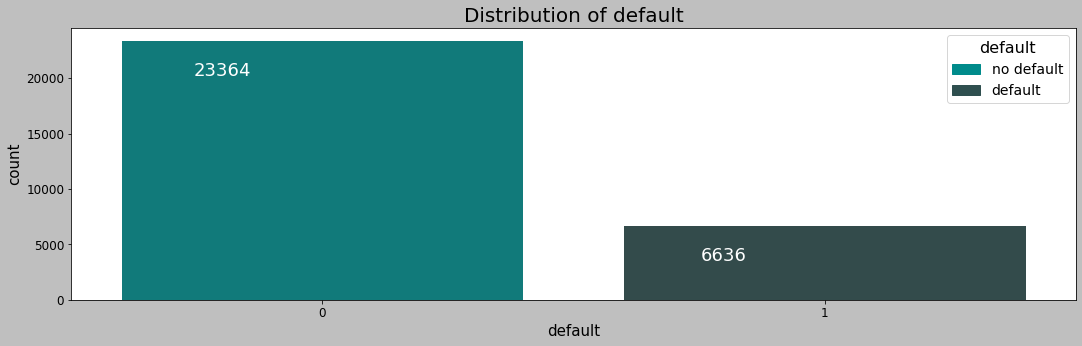

In [17]:
#Distribution of default

#Plot style
plt.style.use("grayscale")

plt.figure(figsize=(18, 5))
ax=sns.countplot(x="default",
                 data=data,
                 palette = ["darkcyan", "darkslategray"])
ax.set_title("Distribution of default", fontsize=20)
plt.xlabel("default",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                va="top",
                color="white",
                size=18)
    
#Settings of legend
darkcyan_patch = mpatches.Patch(color="darkcyan", label= "no default")
darkslategray_patch = mpatches.Patch(color="darkslategray", label= "default")
plt.legend(handles=[darkcyan_patch,
                    darkslategray_patch],
           loc="best",
           prop={"size": 14},
           title="default",
           title_fontsize="16",
           frameon=True)
    
plt.show()

### 3.1.2 Credit limit

In [18]:
#P-value
scipy.stats.normaltest(data["credit_limit"])

NormaltestResult(statistic=3740.095049833546, pvalue=0.0)

In [19]:
#Analysis of distribution of variables
#H0 - The variable comes from a normal distribution
#H1 - The variable does not come from normal distribution
if(scipy.stats.normaltest(data["credit_limit"])[1] < 0.05):
    print("I reject the null hypothesis and accept the alternative hypothesis:"
          "the variable does not come from normal distribution.")
else:
    print("I accept the null hypothesis. The variable comes from a normal distribution.")

I reject the null hypothesis and accept the alternative hypothesis:the variable does not come from normal distribution.


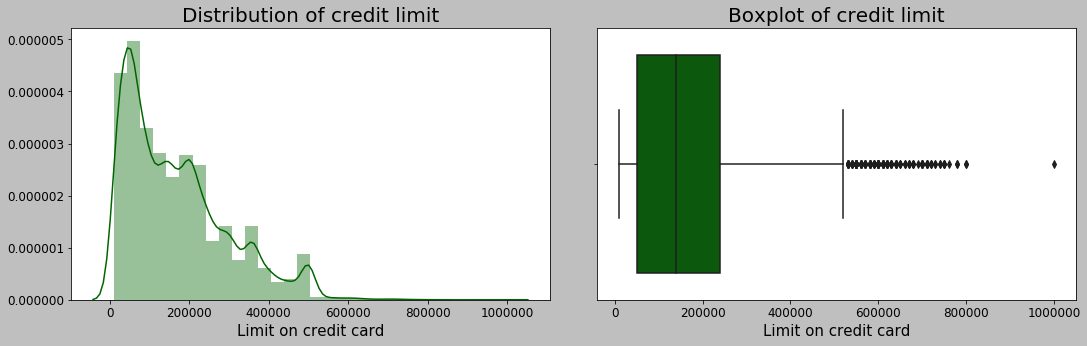

In [20]:
#Price distribution
plt.figure(figsize=(18, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

plt.subplot(1,2,1)
sns.distplot(data["credit_limit"],
             bins=30,
             color="darkgreen",
             kde=True)
plt.title("Distribution of credit limit", fontsize=20)
plt.xlabel("Limit on credit card", fontsize=15)
plt.ylabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data["credit_limit"],
            color = "darkgreen",
            orient="h")
plt.title("Boxplot of credit limit", fontsize=20)
plt.xlabel("Limit on credit card", fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("")

plt.show()

### 3.1.3 Age

In [21]:
#P-value
scipy.stats.normaltest(data["age"])

NormaltestResult(statistic=2171.7037324610715, pvalue=0.0)

In [22]:
#Analysis of distribution of variables
#H0 - The variable comes from a normal distribution
#H1 - The variable does not come from normal distribution
if(scipy.stats.normaltest(data["age"])[1] < 0.05):
    print("I reject the null hypothesis and accept the alternative hypothesis:"
          "the variable does not come from normal distribution.")
else:
    print("I accept the null hypothesis. The variable comes from a normal distribution.")

I reject the null hypothesis and accept the alternative hypothesis:the variable does not come from normal distribution.


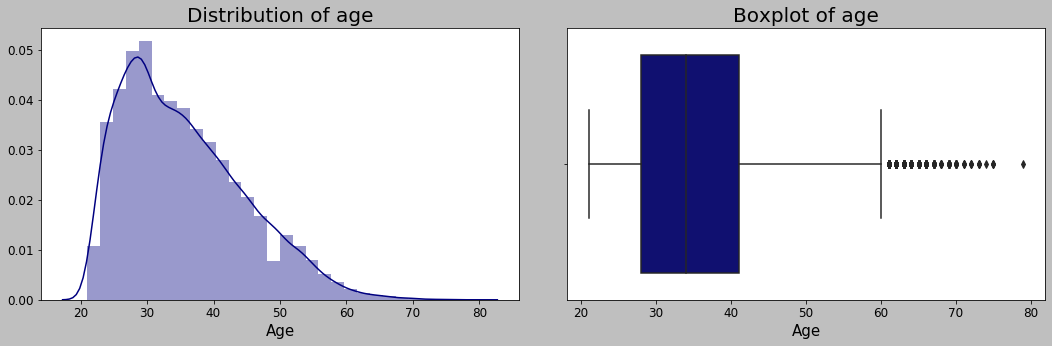

In [23]:
#Price distribution
plt.figure(figsize=(18, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

plt.subplot(1,2,1)
sns.distplot(data["age"],
             bins=30,
             color="navy",
             kde=True)
plt.title("Distribution of age", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(data["age"],
            color = "navy",
            orient="h")
plt.title("Boxplot of age", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("")

plt.show()

### 3.1.4 Bill statement

<font size="4"> Dots symbolize outliers. There is a really large number of outliers. It does not mean, that all of them have to be removed. Removing outliers will take place at a later stage.

In [24]:
#Modification of data structure to visualize data on one boxplot
bill_statement = pd.melt(data,
                    value_vars=["bill_statement_september", "bill_statement_august", "bill_statement_july",
                                "bill_statement_june", "bill_statement_may", "bill_statement_april"],
                    var_name=["Month"],
                    value_name = "Bill statement")
bill_statement.sample()

,Month,Bill statement
115744,bill_statement_june,0


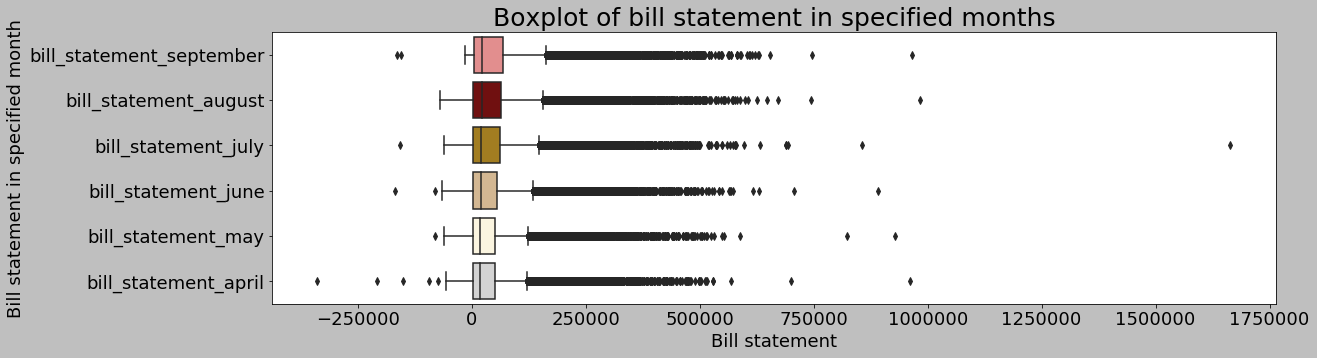

In [25]:
#Boxplot to search outliers
plt.style.use("grayscale")

plt.figure(figsize=(18,5))
sns.boxplot(data = bill_statement,
            y = "Month",
            x = "Bill statement",
            palette=["lightcoral", "maroon", "darkgoldenrod", "burlywood", "cornsilk", "lightgray"])
plt.title("Boxplot of bill statement in specified months", fontsize=25)
plt.xlabel("Bill statement", fontsize=18)
plt.ylabel("Bill statement in specified month", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

### 3.1.5 Payment amount

<font size="4"> Dots symbolize outliers. There is a really large number of outliers. It does not mean, that all of them have to be removed. Removing outliers will take place at a later stage.

In [26]:
#Modification of data structure to visualize data on one boxplot
payment_amount = pd.melt(data,
                         value_vars=["payment_september", "payment_august", "payment_july",
                                     "payment_june", "payment_may", "payment_april"],
                         var_name=["Month"],
                         value_name = "Payment amount")
payment_amount.sample()

,Month,Payment amount
139477,payment_may,3000


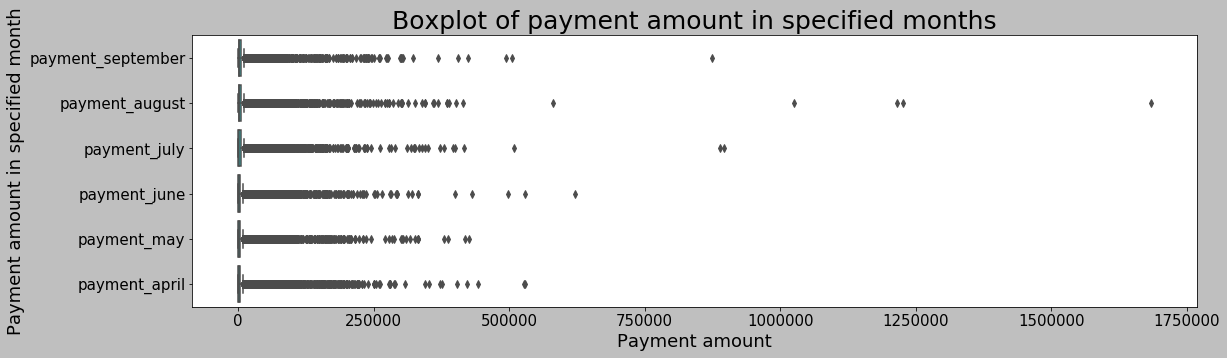

In [27]:
#Boxplot to search outliers
plt.style.use("grayscale")

plt.figure(figsize=(18,5))
sns.boxplot(data = payment_amount,
            y = "Month",
            x = "Payment amount",
            color = "cyan")
plt.title("Boxplot of payment amount in specified months", fontsize=25)
plt.xlabel("Payment amount", fontsize=18)
plt.ylabel("Payment amount in specified month", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## 3.2 Categorical variables

### 3.2.1 Sex

<font size="4"> Women are a larger group in the dataset.

In [28]:
#Distribution of sex in percent in the dataset
sex_percent_dist = data["sex"].value_counts(normalize=True).round(3).to_frame()*100
sex_percent_dist.columns=["sex dist in %"]
sex_percent_dist

,sex dist in %
2,60.4
1,39.6


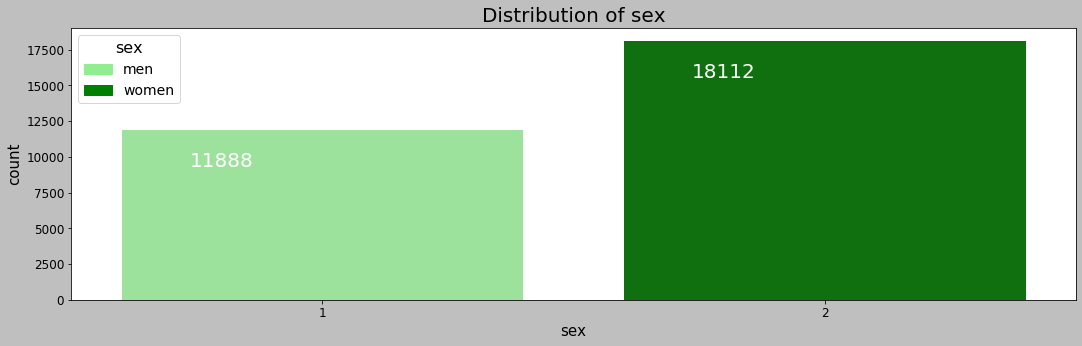

In [29]:
#Distribution of default
plt.style.use("grayscale")

plt.figure(figsize=(18, 5))
ax=sns.countplot(x="sex",
                 data=data,
                 palette = ["lightgreen", "green"])
ax.set_title("Distribution of sex", fontsize=20)
plt.xlabel("sex",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                ha="center",
                va="top",
                color="white",
                size=20)
    
#Settings of legend
lightgreen_patch = mpatches.Patch(color="lightgreen", label= "men")
green_patch = mpatches.Patch(color="green", label= "women")
plt.legend(handles=[lightgreen_patch,
                    green_patch],
           loc="best",
           prop={"size": 14},
           title="sex",
           title_fontsize="16",
           frameon=True)

plt.show()

### 3.2.2 Education

<font size="4"> The majority of people in the dataset are university graduates.

In [30]:
education_percent_dist = data["education"].value_counts(normalize=True).round(3).to_frame()*100
education_percent_dist.columns=["education dist in %"]
education_percent_dist

,education dist in %
2,46.8
1,35.3
3,16.4
0,1.2
4,0.4


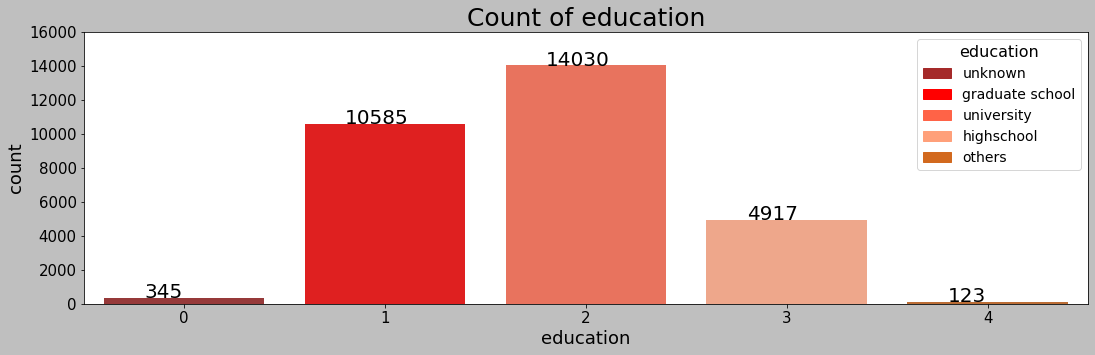

In [31]:
#Distribution of default
plt.style.use("grayscale")

plt.figure(figsize=(18, 5))
ax=sns.countplot(x="education",
                 data=data, 
                 palette=["brown", "r", "tomato", "lightsalmon", "chocolate"])
ax.set_title("Count of education", fontsize=25)
plt.xlabel("education",fontsize=18)
plt.ylabel("count", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set(ylim=(0, 16000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                color="black",
                size=20)
    
#Setting of legend
brown_patch = mpatches.Patch(color="brown", label= "unknown")
r_patch = mpatches.Patch(color="r", label= "graduate school")
tomato_patch = mpatches.Patch(color="tomato", label= "university")
lightsalmon_patch = mpatches.Patch(color="lightsalmon", label= "highschool")
chocolate_patch = mpatches.Patch(color="chocolate", label= "others")
plt.legend(handles=[brown_patch,
                    r_patch,
                    tomato_patch,
                    lightsalmon_patch,
                    chocolate_patch],
           loc="best",
           prop={"size": 14},
           title="education",
           title_fontsize="16",
           frameon=True)

plt.show()

### 3.2.3 Martial status

<font size="4"> Singles are the largest part of the dataset.

In [32]:
martial_status_percent_dist = data["martial_status"].value_counts(normalize=True).round(3).to_frame()*100
martial_status_percent_dist.columns=["martial_status dist in %"]
martial_status_percent_dist

,martial_status dist in %
2,53.2
1,45.5
3,1.1
0,0.2


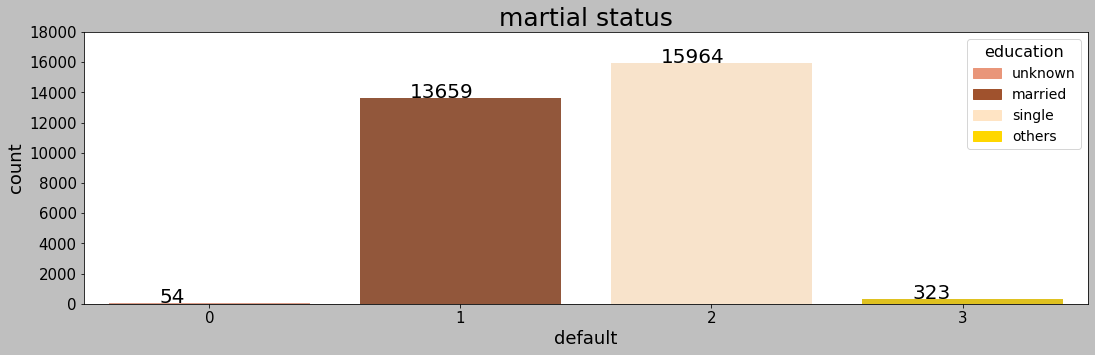

In [33]:
#Distribution of default
plt.style.use("grayscale")

plt.figure(figsize=(18, 5))
ax=sns.countplot(x="martial_status",
                 data=data,
                 palette = ["darksalmon", "sienna", "bisque", "gold"])
ax.set_title("martial status", fontsize=25)
plt.xlabel("default",fontsize=18)
plt.ylabel("count", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set(ylim=(0, 18000))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.2,
                 p.get_height()),
                color="black",
                size=20)

#Setting of legend
darksalmon_patch = mpatches.Patch(color="darksalmon", label= "unknown")
sienna_patch = mpatches.Patch(color="sienna", label= "married")
bisque_patch = mpatches.Patch(color="bisque", label= "single")
gold_patch = mpatches.Patch(color="gold", label= "others")
plt.legend(handles=[darksalmon_patch,
                    sienna_patch,
                    bisque_patch,
                    gold_patch],
           loc="best",
           prop={"size": 14},
           title="education",
           title_fontsize="16",
           frameon=True)
    
plt.show()

# 4. Correlation analysis

## 4.1 Correlation between numerical and target variable - Spearman's correlation coefficient

<font size="4"> For numerical variables, the Spearman correlation coefficient is used, because:

It has no assumption about the normality of the distribution, and according to the tests carried out, the hypothesis about the normality of the distribution for all tested variables was rejected.<br>
Spearman correlation is actually a rank correlation, so it can be used to study the relationship between numerical variables and the target variable, which is a dichotomous variable.


<font size="4"> Observations:<br>
* The closer we get to October, the greater the correlation of individual groups of variables with the target variable,<br>
* Payment delays (positive correlation),<br>
* Amounts on account statements (negative correlation),<br>
* Payment amount (negative correlation),<br>
* The credit limit is negatively correlated with the target variable, so people with a larger limit are less likely to have problems with paying their debts in October,<br>
* The variable age is slightly correlated with the target variable.<br>

In [34]:
#Dataframe with Spearman's correlation coefficients
correlation_numerical_target = pd.DataFrame(scipy.stats.spearmanr(data.drop(["sex",
                                                          "education",
                                                          "martial_status"], axis=1))[0],
                                        columns=data.drop(["sex", "education", "martial_status"], axis=1).columns,
                                        index = data.drop(["sex", "education", "martial_status"], axis=1).columns).iloc[-1,:-1]
correlation_numerical_target= pd.DataFrame(correlation_numerical_target)
correlation_numerical_target.reset_index(inplace=True)

#Spearman's correlation coefficients in absolute value
correlation_numerical_target["abs"]= correlation_numerical_target["default"].abs()

#Sapmple od Data Frame with Spearman's correlation coefficients
correlation_numerical_target.head(3)

,index,default,abs
0,credit_limit,-0.169586,0.169586
1,age,0.005149,0.005149
2,pay_del_september,0.292213,0.292213


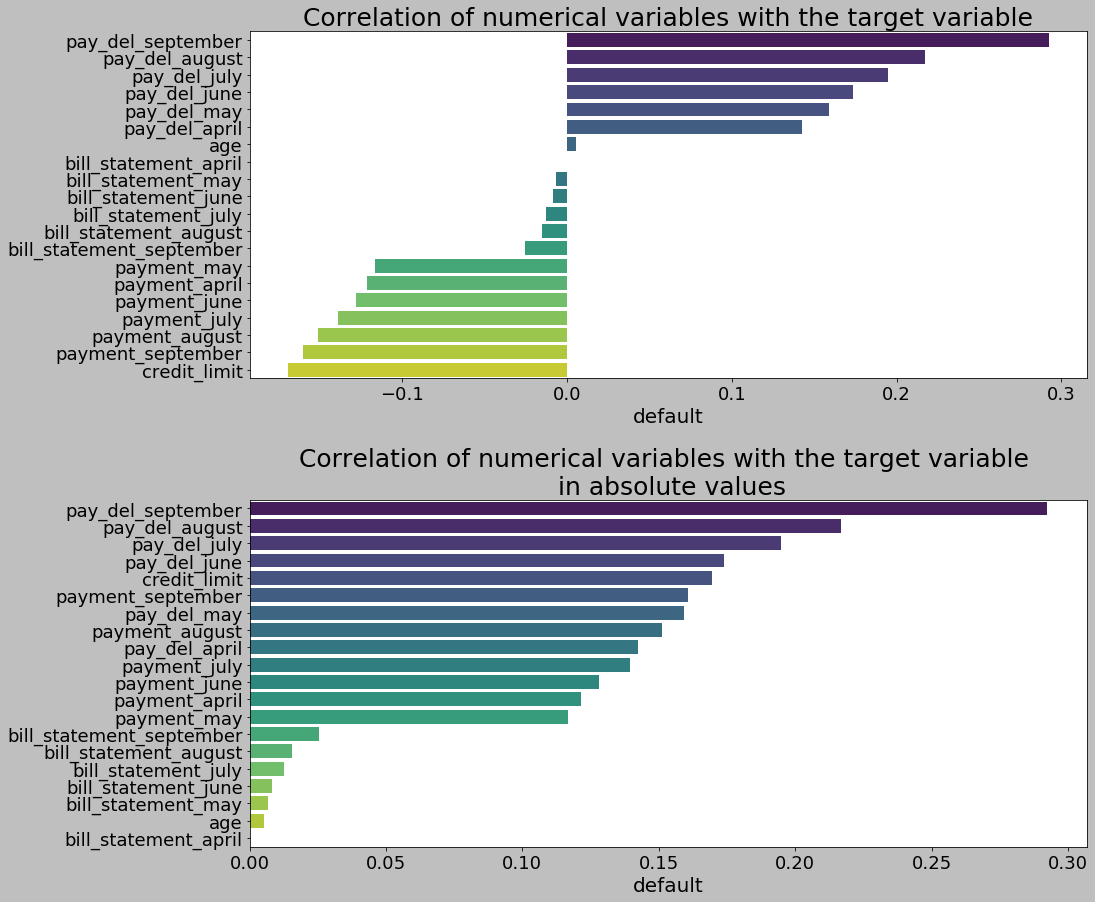

In [35]:
plt.style.use("grayscale")

plt.figure(figsize=(15,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)

plt.subplot(2,1,1)
sns.barplot(data=correlation_numerical_target.sort_values(by="default", ascending=False),
            x ="default",
            y="index",
            palette="viridis")
plt.title("Correlation of numerical variables with the target variable", fontsize=25)
plt.xticks(fontsize=18)
plt.xlabel("default", fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("")

plt.subplot(2,1,2)
sns.barplot(data = correlation_numerical_target.sort_values(by = "abs", ascending=False),
            x = "abs",
            y = "index",
           palette="viridis")
plt.title("Correlation of numerical variables with the target variable \n in absolute values", fontsize=25)
plt.xticks(fontsize=18)
plt.xlabel("default", fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("")


plt.show()

## 4.2 Correlation between cetegorical and target variable - Crammer's V coefficient

<font size="4"> The Crammera V-factor was used to study the relationships between individual categorical variables. It is one of the methods used to study relationships between categorical variables.<br>

Unfortunately it was not possible to find any library with a ready-made method of determining Crameter's V-factor, so the function was made with help of Stackoverflow.com.<br>
<br>
Observations:<br>
* The greatest correlation occurs between the target variable and the "training" variable,<br>
* The smallest level of correlation occurs between the target variable and the "civil status" variable,<br>
* In all three cases the level of correlation is relatively low.

In [36]:
def CramersV(dataset):
    """
    Part 1.
    Function to calculate Cramme's V. Parameter is the dataset.
    """
    a = scipy.stats.chi2_contingency(dataset)[0]/sum(dataset.sum())
    b = min(dataset.shape[0]-1, dataset.shape[1]-1,)
    return(np.sqrt(a/b))
 
def Calculate_CrammersV(dataset):
    """
    Part 2.
    Function to calculate Cramme's V. Parameter is the dataset.
    """
    ret = []
    for m in dataset:
        row = []
        for n in dataset:
            cross_tab = pd.crosstab(dataset[m].values,dataset[n].values)
            row.append(CramersV(cross_tab))
        ret.append(row)
    return pd.DataFrame(ret, columns=dataset.columns, index=dataset.columns)

In [37]:
#Targed variable and categorical variables
categorical_and_target = data[["default", "education", "sex", "martial_status"]]

In [38]:
#Activation the function to calculate Crammer's V 
Calculate_CrammersV(categorical_and_target)

,default,education,sex,martial_status
default,0.999903,0.073164,0.039878,0.034478
education,0.073164,1.000000,0.028428,0.114516
sex,0.039878,0.028428,0.999930,0.033171
martial_status,0.034478,0.114516,0.033171,1.000000


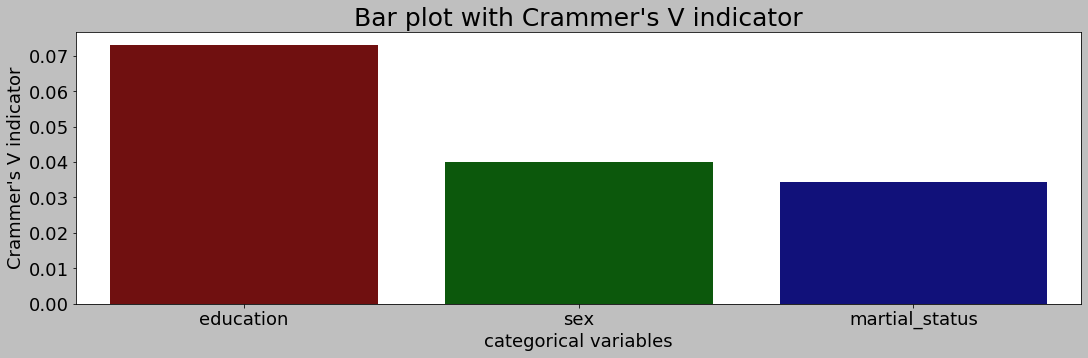

In [39]:
#Plot of Crammer's V indicator for target variable and categorical varaibles
plt.style.use("grayscale")

#Data Frame with Crammer's V
categorical_target_crammerV = pd.DataFrame(Calculate_CrammersV(data[["default",
                                                                    "education",
                                                                    "sex",
                                                                    "martial_status"]]).iloc[0,1:])
categorical_target_crammerV.reset_index(inplace = True)
 
plt.figure(figsize=(18,5))
sns.barplot(data = categorical_target_crammerV,
            y = "default",
            x = "index",
            palette = ["maroon", "darkgreen", "darkblue"])
plt.title("Bar plot with Crammer's V indicator", fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("categorical variables", fontsize=18)
plt.ylabel("Crammer's V indicator", fontsize=18)

plt.show()

## 4.3 Correlation between numerical variables - Spearman's correlation coefficient

<font size="4"> Statement amount in a given month is correlated with the payment in the following month (for example the statement amount for August is correlated with the payment for September), which makes sense. The more we are in debt, the more we pay back. 

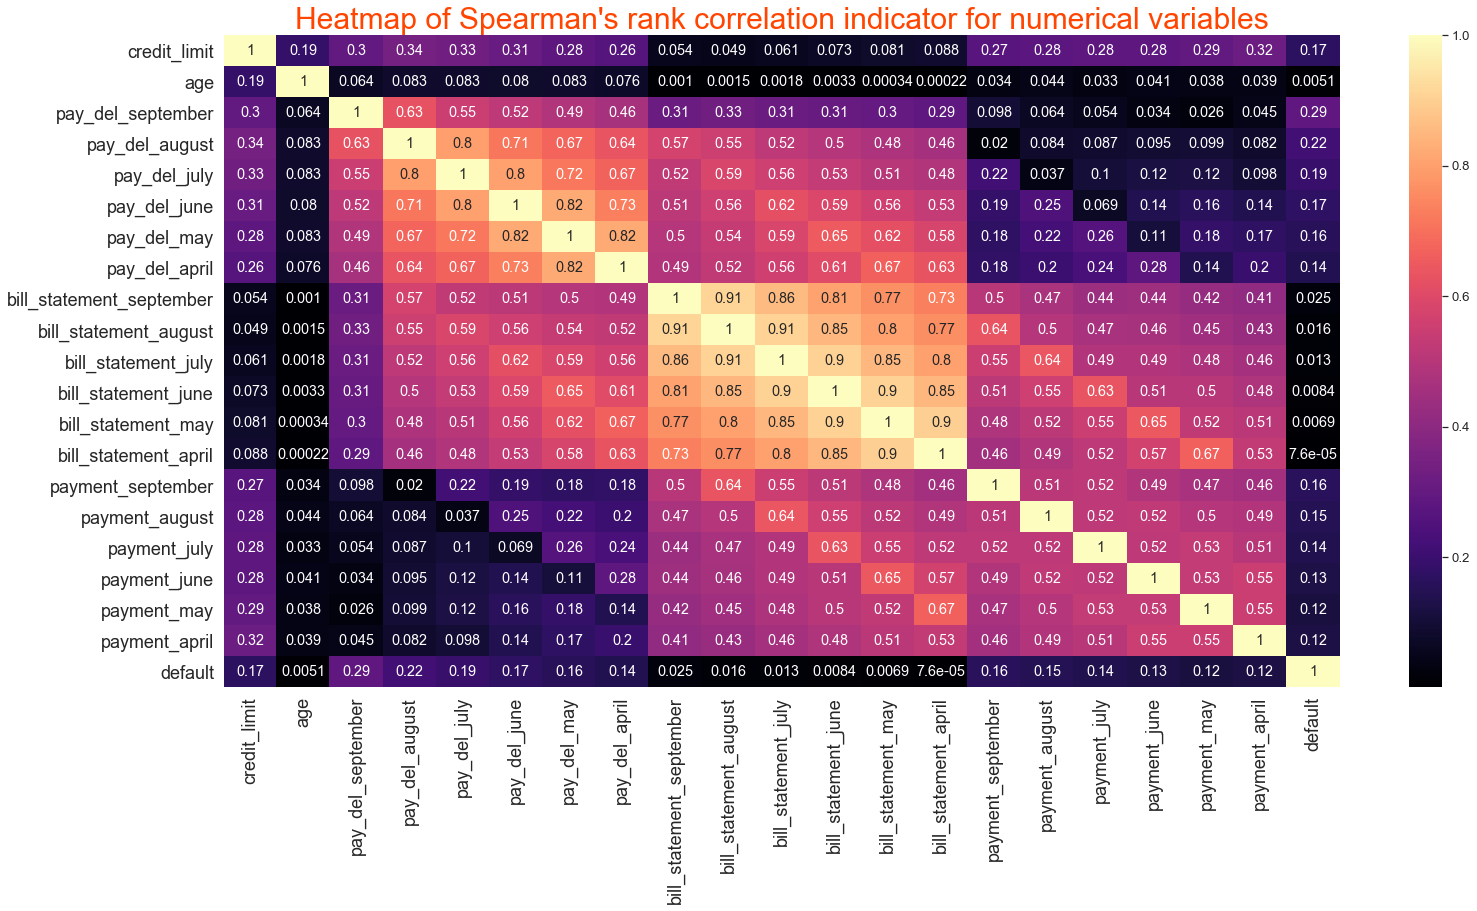

In [40]:
#Plot of Spearman's correlation coefficient
plt.style.use("ggplot")

corr_numerical_spearman = pd.DataFrame(scipy.stats.spearmanr(data.drop(["sex", "education", "martial_status"], axis = 1))[0],
                                              columns = data.drop(["sex", "education", "martial_status"], axis = 1).columns,
                                              index = data.drop(["sex", "education", "martial_status"], axis = 1).columns)
 
plt.figure(figsize=(25,12))
sns.set(font_scale=1.2)
sns.heatmap(corr_numerical_spearman.abs(),
            cmap="magma",
            annot=True)
plt.title("Heatmap of Spearman's rank correlation indicator for numerical variables", fontsize=30, color="orangered")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

## 4.4 Correlation between categorical variables - Crammer's V coefficient

<font size="4"> Correlation between all categorical variables is relatively low, similarly between categorical variables and the target variable.

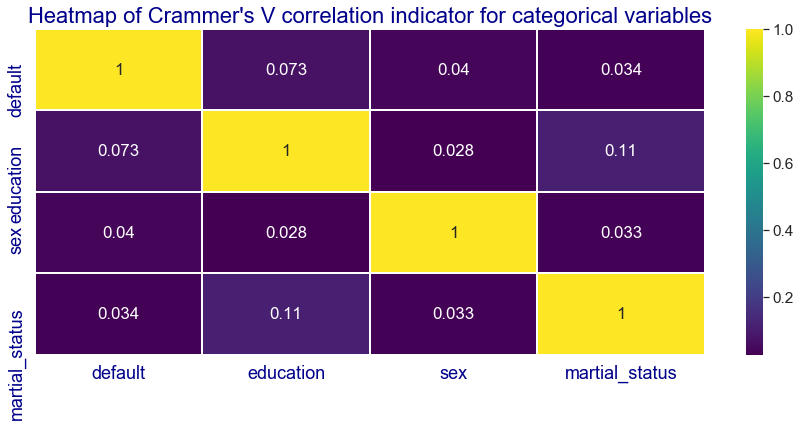

In [41]:
#Plot of Crammer's V indicator for categorical variables
crammer = Calculate_CrammersV(data[["default","education", "sex", "martial_status"]])
 
plt.figure(figsize=(15,6))
sns.set(font_scale=1.4)
sns.heatmap(crammer,
            cmap="viridis",
            linewidths=.9,
            annot=True)
plt.title("Heatmap of Crammer's V correlation indicator for categorical variables", fontsize=22, color="darkblue")
plt.xticks(fontsize=18, color="darkblue")
plt.yticks(fontsize=18, color="darkblue")

plt.show()

# 5. Identifying and removing of outliers - Z-score

<font size="4"> In Z-score it is assumed that every observation, for which the value of statistics from is greater than 3 or less than -3 is an outlier. Technically, it’s a measure of how many standard deviations below or above the population mean a raw score is. A z-score can be placed on a normal distribution curve. Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve).<br>

In [42]:
#Shape of the dataset before removing of outliers
data.shape

(30000, 24)

In [43]:
#Numer of rows before removing of outliers
rows_before_remove_outliers = data.shape[0]
rows_before_remove_outliers

30000

In [44]:
#Find absolute value of z-score for each observation
z_score = np.abs(scipy.stats.zscore(data))

In [45]:
#Only keep rows in dataframe with all z-scores less than absolute value of 3 
data = data[(z_score<3).all(axis=1)]

In [46]:
#Shape of the dataset after removing of outliers
data.shape

(26587, 24)

In [47]:
#Numer of rows after removing of outliers
rows_after_remove_outliers = data.shape[0]
rows_after_remove_outliers

26587

In [48]:
#Number of removed observations (outliers)
removed_outliers = rows_before_remove_outliers - rows_after_remove_outliers
print("{} obserwations has been removed as outliers.".format(removed_outliers))

3413 obserwations has been removed as outliers.


# 6. Dummying

<font size="4"> Default and sex vexariables already have binary values, so the encoding of variables education and material status has been changed.<br>
In linear models, you should be careful about the problem of collinearity. When placing all categories of a given variable in the model there is a perfect collinearity. Therefore, you should remove one category each of those variables that have been saved in more than one column. In this case it were: education_0 and martial_status_0.

In [49]:
#Sample of the dataset before dummying
data.sample()

,credit_limit,sex,education,martial_status,age,pay_del_september,pay_del_august,pay_del_july,pay_del_june,pay_del_may,...,bill_statement_june,bill_statement_may,bill_statement_april,payment_september,payment_august,payment_july,payment_june,payment_may,payment_april,default
16220,180000,2,1,2,44,0,0,2,0,0,...,8960,6310,4656,2489,0,1166,126,112,244,1


In [50]:
#Dummying fot categorical variables: education and martial_status
data=pd.get_dummies(data, columns=["education", "martial_status"])

In [51]:
#Removing of one category from each variable stored in more than one column
data.drop(labels = ["education_0", "martial_status_0"], axis=1, inplace = True)

In [52]:
#Sample of dataset after dummying
data.sample()

,credit_limit,sex,age,pay_del_september,pay_del_august,pay_del_july,pay_del_june,pay_del_may,pay_del_april,bill_statement_september,...,payment_june,payment_may,payment_april,default,education_1,education_2,education_3,martial_status_1,martial_status_2,martial_status_3
20241,90000,2,55,-2,-2,-2,-2,-2,-2,3388,...,0,7707,0,0,0,1,0,1,0,0


# 7.  Machine Learning Models

## 7.1 Model 1 - Logistic Regression in statsmodels with variables selection based on IV indicator

### Features selection - Information Value (IV) indicator
Variables were selected based on IV determining the predictive power of each variable.<br>
Unfortunately it was not possible to find any library with a ready-made method of determining IV indicator, so the function was made with help of Stackoverflow.com.<br>

<0.02 - useless for prediction<br>
0.02 to 0.1 - weak predictor<br>
0.1 to 0.3 - medium predictor<br>
0.3 - 0.5 - strong predictor<br>
larger than 0.5 - suspicious or too good to be true<br>

Only variables selected for the model were those that are medium or strong predictors.

In [53]:
#Function for calculation of IV and WOE
def iv_woe_calculation(data, target, bins=10):
    """
    WoE and IV calculation function based on dataset and target value - default.
    """
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in "bifc") and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates="drop")
            d0 = pd.DataFrame({"x": binned_x, "y": data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], "y": data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ["Cutoff", "N", "Events"]
        d["% of Events"] = np.maximum(d["Events"], 0.5) / d["Events"].sum()
        d['Non-Events'] = d["N"] - d["Events"]
        d["% of Non-Events"] = np.maximum(d["Non-Events"], 0.5) / d["Non-Events"].sum()
        d["WoE"] = np.log(d["% of Events"]/d["% of Non-Events"])
        d["IV"] = d["WoE"] * (d["% of Events"] - d["% of Non-Events"])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d["IV"].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d["IV"].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

In [54]:
#Activation of the function to calculate IV for each variable
iv_woe_calculation(data,"default", bins=10)

Information value of credit_limit is 0.149525
Information value of sex is 0.008573
Information value of age is 0.0165
Information value of pay_del_september is 0.840292
Information value of pay_del_august is 0.508712
Information value of pay_del_july is 0.369234
Information value of pay_del_june is 0.326045
Information value of pay_del_may is 0.291532
Information value of pay_del_april is 0.254467
Information value of bill_statement_september is 0.016557
Information value of bill_statement_august is 0.012118
Information value of bill_statement_july is 0.009767
Information value of bill_statement_june is 0.015922
Information value of bill_statement_may is 0.02416
Information value of bill_statement_april is 0.017443
Information value of payment_september is 0.142656
Information value of payment_august is 0.122994
Information value of payment_july is 0.103825
Information value of payment_june is 0.078325
Information value of payment_may is 0.068559
Information value of payment_april is 0

In [55]:
#Features selected based on Information Value (IV) indicator
selected_features = ["credit_limit", "pay_del_august", "pay_del_july",
                     "pay_del_june", "pay_del_may", "pay_del_april",
                     "payment_september", "payment_august", "payment_july"]

### Model building and evaluation

In [56]:
#Assigning data to variables in the model
X_model_1 = data[selected_features]
y_model_1 = data["default"]

In [57]:
#Train/test split
X_train_model_1, X_test_model_1, y_train_model_1, y_test_model_1 = train_test_split(X_model_1,
                                                                                    y_model_1,
                                                                                    test_size = 0.3,
                                                                                    random_state = 0,
                                                                                    stratify=y_model_1)
print("Training dataset shape:", X_train_model_1.shape, y_train_model_1.shape)
print("Testing dataset shape:", X_test_model_1.shape, y_test_model_1.shape)

Training dataset shape: (18610, 9) (18610,)
Testing dataset shape: (7977, 9) (7977,)


In [58]:
#Function to build and evaluate the first logistic regression model
def building_evaluation__model(selected_features, plots):
    """
    Building of the first Logistic Regression model using library statsmodels
    based on selected features and ploting of ROC curve and calculate Gini,
    AUC as well as number of variables. Moreover, comparison of results on test and train datasets.
    """
    model = sm.Logit(y_train_model_1, X_train_model_1[selected_features]).fit(disp = 0)
    pre = model.predict(X_test_model_1[selected_features])
    fpr, tpr, thresholds = roc_curve(y_test_model_1, pre)
    pre_train = model.predict(X_train_model_1[selected_features])
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_model_1, pre_train)
    gini_score = 2 * auc(fpr, tpr) - 1
    gini_score_train = 2 * auc(fpr_train, tpr_train) - 1
    #Comparison of results - test and train dataset
    print("Test dataset")
    print("Gini score: {}".format(round(gini_score,2)))
    print("AUC: {}".format(round(auc(fpr, tpr),2)))
    print("Number of features: {}".format(len(selected_features)))
    print("*"*40)
    print("Train dataset")
    print("Gini score: {}".format(round(gini_score_train,2)))
    print("AUC: {}".format(round(auc(fpr_train, tpr_train),2)))
    print("Number of features: {}".format(len(selected_features)))
    
    if plots == True:
        #ROC curve - comparison
        #test dataset
        plt.style.use("grayscale")
        plt.figure(figsize=(20,5))
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None)
        #lw = 2
        plt.subplot(1,2,1)
        plt.plot(fpr,
                 tpr,
                 color="black",
                 #lw=lw,
                 label="AUC = %0.2f" % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], "r--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.title("Test dataset - Receiver Operating Characteristic", fontsize=25)
        plt.xticks(fontsize= 15)
        plt.yticks(fontsize=15)
        plt.xlabel("False Positive Rate", fontsize=18)
        plt.ylabel("True Positive Rate", fontsize=18)
        plt.legend(loc=4,
                   prop={"size": 16},
                   title="Area Under Curve",
                   title_fontsize="17",
                   frameon=True)
        #train dataset
        pre_train = model.predict(X_train_model_1[selected_features])
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train_model_1, pre_train)
        plt.subplot(1,2,2)
        plt.plot(fpr_train,
                 tpr_train,
                 color="black",
                 #lw=lw,
                 label="AUC = %0.2f" % auc(fpr_train, tpr_train))
        plt.plot([0, 1], [0, 1], "r--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.title("Train dataset - Receiver Operating Characteristic", fontsize=25)
        plt.xticks(fontsize= 15)
        plt.yticks(fontsize=15)
        plt.xlabel("False Positive Rate", fontsize=18)
        plt.ylabel("True Positive Rate", fontsize=18)
        plt.legend(loc=4,
                   prop={"size": 16},
                   title="Area Under Curve",
                   title_fontsize="17",
                   frameon=True)
        plt.show()
 
    
    return gini_score, model

<font size="4"> Below results in both datasets (test and training) are comparable, so there is no overfitting. Furthermore, results are also not really low, so there is also no underfitting of the model.

Test dataset
Gini score: 0.36
AUC: 0.68
Number of features: 9
****************************************
Train dataset
Gini score: 0.38
AUC: 0.69
Number of features: 9


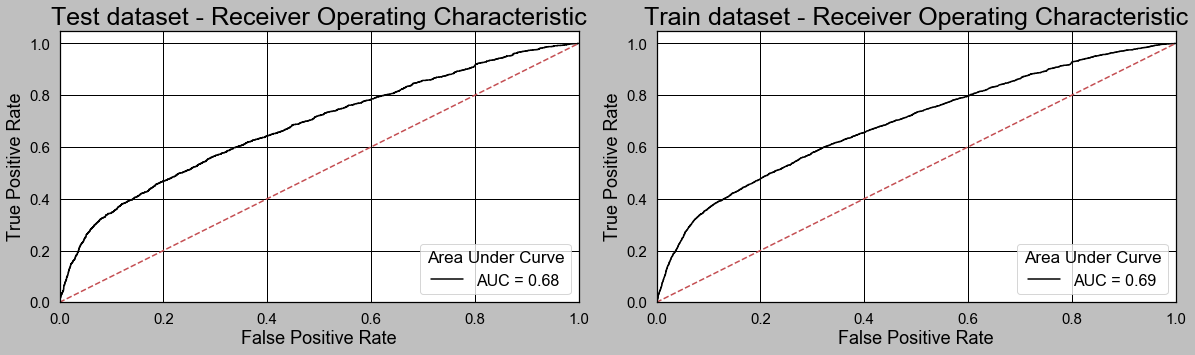

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                18610
Model:                          Logit   Df Residuals:                    18601
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                 0.05987
Time:                        22:31:20   Log-Likelihood:                -9301.0
converged:                       True   LL-Null:                       -9893.3
Covariance Type:            nonrobust   LLR p-value:                1.975e-250
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
credit_limit      -3.089e-06   1.71e-07    -18.055      0.000   -3.42e-06   -2.75e-06
pay_del_august        0.2034      0.023      8.769      0.000       0.158       0.249
pay_del_july          0.

In [59]:
#Model quality verification
score, model = building_evaluation__model(selected_features, True)
print(model.summary())

<font size="4">**Interpretation of Model Summary**
* The model was fitted using the Maximum Likelihood Estimation (MLE) technique.
* The above table provides a log-likelihood ratio test. Likelihood Ratio test (often termed as LR test) is a goodness of fit test used to compare between two models; the null model and the final model. The test revealed that when the model fitted with only intercept (null model) then the log-likelihood was -9893.3, which significantly improved when fitted with all independent variables (Log-Likelihood = -9301.0). Fit improvement is also significant (p-value <0.05).
* Only one variable (pay_del_july) is not statistically significant (p-value >0.05). This variable will not be subject to interpretation of odds ratio (below). Other variables have a significant impact on default.

In [60]:
#Preditions of the model
prediction = model.predict(X_test_model_1)
prediction_training = model.predict(X_test_model_1)

### Confusion Matrix
<font size="4">The upper left and lower right quarters contain correct classification results, and the lower left and upper right are incorrect. The left lower quarter contains false negative results and the right upper quarter contains false positive results.

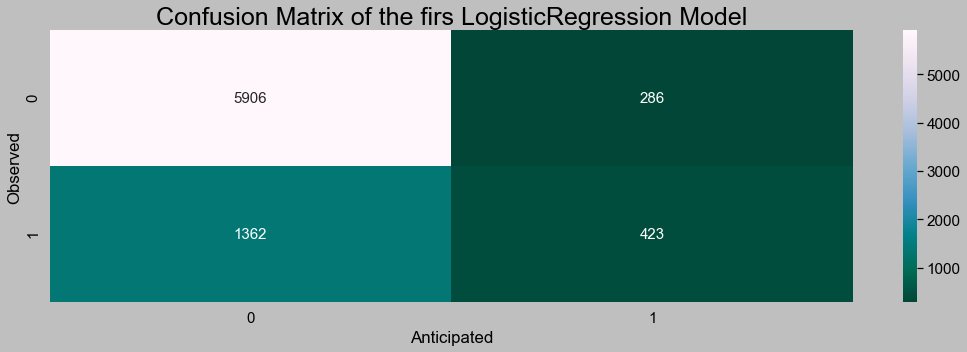

----------------------------------------
True Negative: 5906
False Positive: 1362
False Negative: 286
True Positive: 423
Correct Predictions 79.34 %
----------------------------------------
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.79 
 The Missclassification = 1-Accuracy =  0.21 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.6 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.81 
 Positive Predictive value = TP/(TP+FP) =  0.24 
 Negative predictive Value = TN/(TN+FN) =  0.95 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.18 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.5


In [61]:
#Confusion matrix
plt.figure(figsize=(18,5))

confusion_matrix = pd.crosstab(y_test_model_1,
                               prediction.round(),
                               rownames=["Observed"],
                               colnames=["Anticipated"])
sns.heatmap(confusion_matrix,
            annot=True,
            annot_kws={"fontsize": 15},
            fmt = "d",
            cmap="PuBuGn_r",
            xticklabels=["0","1"],
            yticklabels=["0","1"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Confusion Matrix of the firs LogisticRegression Model", fontsize=25)
plt.show()

print("-"*40)

TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)
print("Correct Predictions", round((TN + TP) / len(prediction.round()) * 100, 2), "%")

print("-"*40)

print("The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ",round((TP+TN)/float(TP+TN+FP+FN),2),"\n",  
"The Missclassification = 1-Accuracy = ",round(1-((TP+TN)/float(TP+TN+FP+FN)),2),"\n",   
"Sensitivity or True Positive Rate = TP/(TP+FN) = ",round(TP/float(TP+FN),2),"\n", 
"Specificity or True Negative Rate = TN/(TN+FP) = ",round(TN/float(TN+FP),2),"\n",
"Positive Predictive value = TP/(TP+FP) = ",round(TP/float(TP+FP),2),"\n",
"Negative predictive Value = TN/(TN+FN) = ",round(TN/float(TN+FN),2),"\n",
"Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ",round(sensitivity/(1-specificity),2),"\n",
"Negative likelihood Ratio = (1-Sensitivity)/Specificity = ", round((1-sensitivity)/specificity,2))

### Classification Report and Indicators: Accuracy, Recall, Precision, F1
<font size="4">**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [62]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_1, prediction.round()))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      6192
           1       0.60      0.24      0.34      1785

    accuracy                           0.79      7977
   macro avg       0.70      0.60      0.61      7977
weighted avg       0.76      0.79      0.76      7977



### Comparison of results on test and train dataset

In [63]:
#Gini and AUC from test and train dataset
pre = model.predict(X_test_model_1[selected_features])
fpr, tpr, thresholds = roc_curve(y_test_model_1, pre)
gini_score = 2 * auc(fpr, tpr) - 1

pre_train = model.predict(X_train_model_1[selected_features])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_model_1, pre_train)
gini_score_train = 2 * auc(fpr_train, tpr_train) - 1

#Gini and AUC for test dataset
gini_test_1 = gini_score.round(2)
AUC_test_1 = auc(fpr, tpr).round(2)

#Gini and AUC for training dataset
gini_train_1 = gini_score_train.round(2)
AUC_train_1 = auc(fpr_train, tpr_train).round(2)

In [64]:
#Data Frame with comparison of results on test and train datasets
mcomparison_test_train_model_1 =pd.DataFrame({"dataset": ["test", "train"],
                                              "AUC"    : [AUC_test_1, AUC_train_1],
                                              "Gini"   : [gini_test_1, gini_train_1]}).set_index("dataset")
mcomparison_test_train_model_1

,AUC,Gini
dataset,,
test,0.68,0.36
train,0.69,0.38


<font size="4"> Results in both datasets (test and training) are comparable, so there is no overfitting. Furthermore, results are also not really low, so there is also no underfitting of the model.

### Model interpretation

In [65]:
#Odds Ratio
print(np.exp(model.params))

credit_limit         0.999997
pay_del_august       1.225584
pay_del_july         1.056163
pay_del_june         1.127681
pay_del_may          1.104125
pay_del_april        1.072358
payment_september    0.999919
payment_august       0.999921
payment_july         0.999959
dtype: float64


In [66]:
#Odds Ratio to interpretation
round((np.exp(model.params)-1)*100,2)

credit_limit         -0.00
pay_del_august       22.56
pay_del_july          5.62
pay_del_june         12.77
pay_del_may          10.41
pay_del_april         7.24
payment_september    -0.01
payment_august       -0.01
payment_july         -0.00
dtype: float64

<font size="4">**Interpretation of Odds Ratio**
* credit_limit - increase in credit limit by one unit reduces the chances of problems with payment of commitment by less than 0.01%
* pay_del_august - each month of late payment (as of August) increases the chances of problems with the payment of a commitment by more than 22%
* pay_del_july - not statistically significant (p-value >0.05), variables does not have significant impact on default
* pay_del_june - each month of late payment (as of June) increases the chances of problems with the payment of a commitment by more than 12%
* pay_del_may - each month of late payment (as of May) increases the chances of problems with the payment of a commitment by more than 12%
* pay_del_april - each month of late payment (as of April) increases the chances of problems with the payment of a commitment by more than 7%
* payment_september - increase in payments by one unit in September reduces the chances of problems with payment of commitment by around 0.01%
* payment_august - increase in payments by one unit in August reduces the chances of problems with payment of commitment by around 0.01%
* payment_july - increase in payments by one unit in August reduces the chances of problems with payment of commitment by less than 0.01%

In [67]:
#Marginal Effects Computation 
#overall - the average of teh marginal effects at each observation
#dydx - no transformation is made and marginal effects are returned
marginal_effects = model.get_margeff(at="overall", method="dydx")
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:                default
Method:                          dydx
At:                           overall
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
credit_limit      -5.128e-07   2.74e-08    -18.696      0.000   -5.67e-07   -4.59e-07
pay_del_august        0.0338      0.004      8.831      0.000       0.026       0.041
pay_del_july          0.0091      0.005      1.941      0.052   -8.99e-05       0.018
pay_del_june          0.0199      0.005      3.959      0.000       0.010       0.030
pay_del_may           0.0164      0.005      3.089      0.002       0.006       0.027
pay_del_april         0.0116      0.004      2.718      0.007       0.003       0.020
payment_september -1.348e-05   1.16e-06    -11.596      0.000   -1.58e-05   -1.12e-05
payment_august    -1.305e-05   1.12e-06    -11.671      0.000   -1.52e-05 

<font size="4">**Interpretation of Marginal Effects**<br>
The Average Marginal Effets table reports AMEs, standard error, z-values, p-values and 95% confidence intervals. <br> 
* pay_del_august - each month of late payment (as of August) increases probability of problems with the payment of commitment by 3.38%
* pay_del_july - not statistically significant (p-value >0.05), variables does not have significant impact on default
* pay_del_june - each month of late payment (as of August) increases probability of problems with the payment of commitment by 1.99%
* pay_del_may - each month of late payment (as of August) increases probability of problems with the payment of commitment by 1.64%
* pay_del_april - each month of late payment (as of August) increases probability of problems with the payment of commitment by 1.16%
* credit_limit, payment_september, payment_august, payment_july - an increase by one unit in these variables results in a very low decrease of probability of default

## 7.2 Model 2 - Logistic Regression in sklearn with forward variables selection

### Dataset formatting

In [68]:
#Sample of the dataset before modification
data.sample()

,credit_limit,sex,age,pay_del_september,pay_del_august,pay_del_july,pay_del_june,pay_del_may,pay_del_april,bill_statement_september,...,payment_june,payment_may,payment_april,default,education_1,education_2,education_3,martial_status_1,martial_status_2,martial_status_3
9611,150000,1,31,-1,-1,-1,-1,-1,-1,4213,...,5547,3576,5138,0,0,0,1,0,1,0


In [69]:
#Checking of number of columns in the dataset before modification
data.shape[1]

28

In [70]:
#Changing the position of "default" column in the dataset to the last one
column_name="default"
default_column = data.pop(column_name)
data.insert(27, column_name, default_column)

In [71]:
#Checking of number of columns in the dataset after modification
data.shape[1]

28

In [72]:
#Sample of the dataset after modification
data.sample()

,credit_limit,sex,age,pay_del_september,pay_del_august,pay_del_july,pay_del_june,pay_del_may,pay_del_april,bill_statement_september,...,payment_june,payment_may,payment_april,education_1,education_2,education_3,martial_status_1,martial_status_2,martial_status_3,default
16783,20000,1,31,0,0,0,0,2,2,13192,...,694,0,3134,0,1,0,0,1,0,1


### Features selection - forward selection method

In [73]:
#Train/test split
X_train_model_2, X_test_model_2, y_train_model_2, y_test_model_2 = train_test_split(data.values[:,:-1],
                                                                                  data.values[:,-1:],
                                                                                  test_size=0.3,
                                                                                  random_state=1,
                                                                                  stratify=data.values[:,-1:])


print("Training dataset shape:", X_train_model_2.shape, y_train_model_2.shape)
print("Testing dataset shape:", X_test_model_2.shape, y_test_model_2.shape)

Training dataset shape: (18610, 27) (18610, 1)
Testing dataset shape: (7977, 27) (7977, 1)


In [74]:
#Build classifier to use in feature selection
logistic_regression_2 = LogisticRegression()

#Build step forward feature selection
sfs1 = sfs(logistic_regression_2,
           k_features=10,
           forward=True,
           floating=False,
           verbose=0,
           scoring="accuracy",
           cv=5)

#Perform SFFS
sfs1 = sfs1.fit(X_train_model_2, y_train_model_2)

In [75]:
#Indexes of selected features
feat_cols = list(sfs1.k_feature_idx_)
feat_cols

[1, 2, 3, 7, 8, 21, 22, 23, 25, 26]

In [76]:
#Features selected by forward variables selection
selected_features_forward_method = data.iloc[[0], [1, 2, 3, 7, 8, 21, 22, 23, 25, 26]]

In [77]:
#Summary of the output
print("Best score: %6f" % sfs1.k_score_)
print("Indexes of selected features:", feat_cols)
print("Selected features:", selected_features_forward_method.columns.to_list())

Best score: 0.811177
Indexes of selected features: [1, 2, 3, 7, 8, 21, 22, 23, 25, 26]
Selected features: ['sex', 'age', 'pay_del_september', 'pay_del_may', 'pay_del_april', 'education_1', 'education_2', 'education_3', 'martial_status_2', 'martial_status_3']


In [78]:
#Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs1.subsets_).T
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[0.8116603976356798, 0.8095110155830199, 0.822...",0.815852,"(3,)"
2,"(1, 3)","[0.8116603976356798, 0.8095110155830199, 0.822...",0.815852,"(1, 3)"
3,"(1, 3, 22)","[0.8116603976356798, 0.8095110155830199, 0.822...",0.815852,"(1, 3, 22)"
4,"(1, 3, 22, 26)","[0.8116603976356798, 0.8095110155830199, 0.822...",0.815852,"(1, 3, 22, 26)"
5,"(1, 3, 21, 22, 26)","[0.8116603976356798, 0.8095110155830199, 0.817...",0.814777,"(1, 3, 21, 22, 26)"
6,"(1, 3, 21, 22, 23, 26)","[0.8119290703922623, 0.8100483610961848, 0.817...",0.815046,"(1, 3, 21, 22, 23, 26)"
7,"(1, 2, 3, 21, 22, 23, 26)","[0.8119290703922623, 0.8103170338527673, 0.813...",0.812789,"(1, 2, 3, 21, 22, 23, 26)"
8,"(1, 2, 3, 21, 22, 23, 25, 26)","[0.8119290703922623, 0.8052122514777001, 0.808...",0.810586,"(1, 2, 3, 21, 22, 23, 25, 26)"
9,"(1, 2, 3, 8, 21, 22, 23, 25, 26)","[0.8081676518001075, 0.8070929607737776, 0.812...",0.810747,"(1, 2, 3, 8, 21, 22, 23, 25, 26)"
10,"(1, 2, 3, 7, 8, 21, 22, 23, 25, 26)","[0.8068242880171951, 0.8084363245566899, 0.815...",0.811177,"(1, 2, 3, 7, 8, 21, 22, 23, 25, 26)"


### Model building

In [79]:
#Build full model with selected features
logistic_regression_2 = LogisticRegression()
logistic_regression_2.fit(X_train_model_2[:, feat_cols], y_train_model_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
#Prediction of the model
predictions_model_2 = logistic_regression_2.predict(X_test_model_2[:, feat_cols])
predictions_model_2_training = logistic_regression_2.predict(X_train_model_2[:, feat_cols])

### Model evaluation

<font size="4">**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [81]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_2, predictions_model_2))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6192
           1       0.72      0.26      0.38      1785

    accuracy                           0.81      7977
   macro avg       0.77      0.61      0.63      7977
weighted avg       0.80      0.81      0.78      7977



In [82]:
#Function to plot ROC - used to plot ROC curve in model 2 and model 3
def roc_plot(model, x_test_or_train_dataset, y_test_or_train_dataset, kind_dataset):
    """
    Building ROC curve based on arguments: model, x from test dataset, y from test dataset, kind of dataset: test or train.
    """
    y_pred_proba = model.predict_proba(x_test_or_train_dataset)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test_or_train_dataset, y_pred_proba)
    auc = metrics.roc_auc_score(y_test_or_train_dataset, y_pred_proba)
    plt.plot(fpr, tpr, label="Logistic Regression (auc = %0.2f)" % auc, color="black")
    plt.xlabel("False Positive Rate",color="grey", fontsize = 18)
    plt.ylabel("True Positive Rate",color="grey", fontsize = 18)
    if kind_dataset == "test":
        plt.title("Test dataset - Receiver Operating Characteristic", fontsize=25)
    elif kind_dataset == "train":
        plt.title("Train dataset - Receiver Operating Characteristic", fontsize=25)
    plt.legend(loc=4, 
               fontsize=15,
               prop={"size": 14},
               title="Area Under Curve",
               title_fontsize="16",
               frameon=True)
    plt.plot([0, 1], [0, 1],"r--")

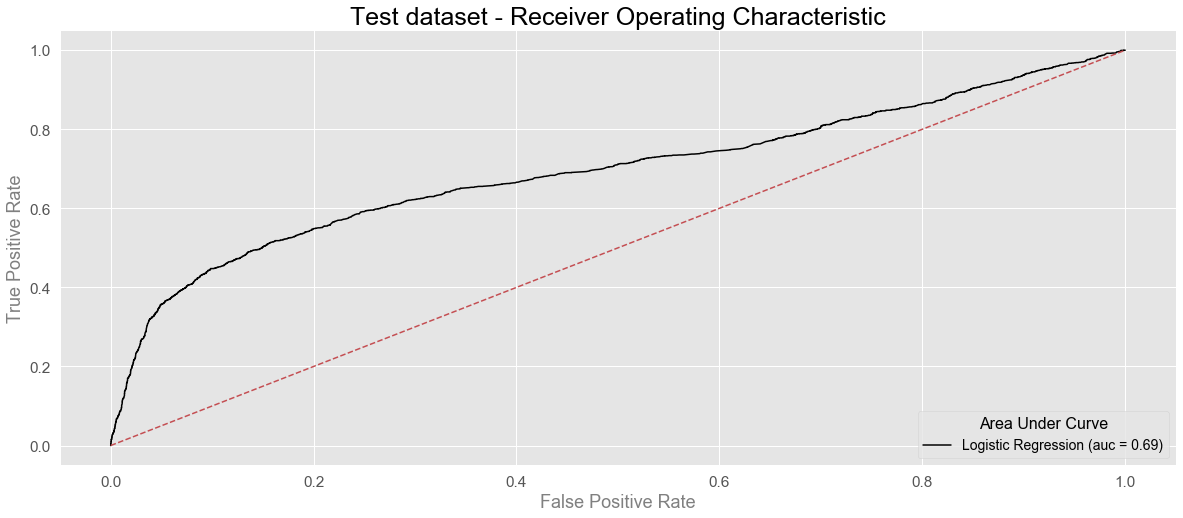

In [83]:
#Activate function to build ROC curve
plt.style.use("ggplot")
plt.figure(figsize=(20,8))
roc_plot(logistic_regression_2, X_test_model_2[:, feat_cols], y_test_model_2, kind_dataset="test")

plt.show()

In [84]:
#Calculation of area under the ROC curve and Gini Index
y_pred_proba_model_2 = logistic_regression_2.predict_proba(X_test_model_2[:, feat_cols])[::,1]
AUC_model_2 = round(roc_auc_score(y_test_model_2, y_pred_proba_model_2),2)
accuracy_test_model_2 = accuracy_score(y_test_model_2, predictions_model_2)
print("AUC (Area under the curve) is:", AUC_model_2)
print("Gini:", round(2*AUC_model_2-1,2))
print("Accuracy:", round(accuracy_test_model_2,2))

AUC (Area under the curve) is: 0.69
Gini: 0.38
Accuracy: 0.81


### Comparison of results on test and train datasets

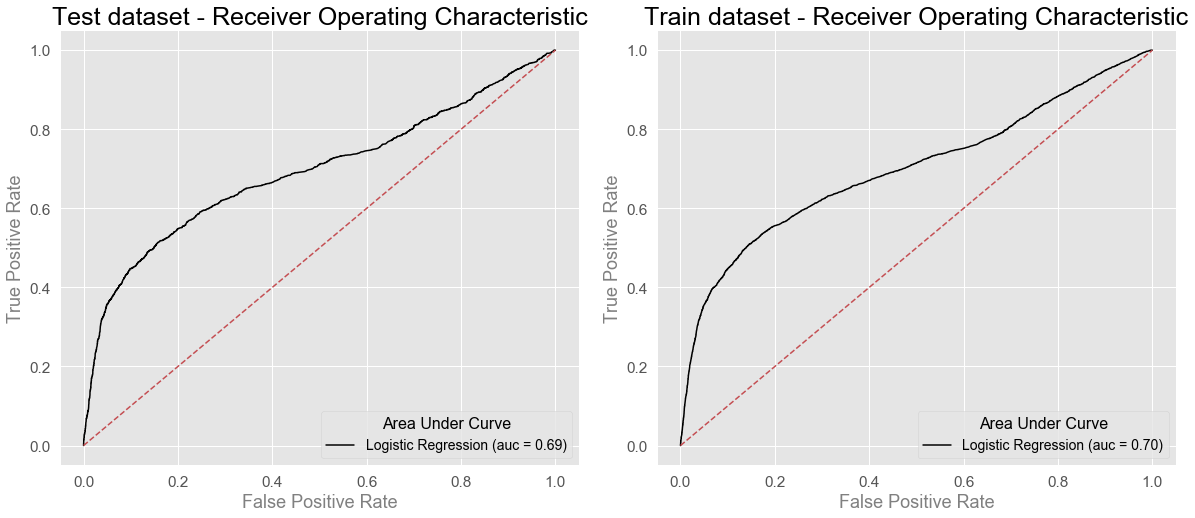

In [85]:
#ROC curves plots for test and train dataset
plt.style.use("ggplot")
plt.figure(figsize=(20,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None)

plt.subplot(1,2,1)
roc_plot(logistic_regression_2, X_test_model_2[:, feat_cols], y_test_model_2, kind_dataset="test")

plt.subplot(1,2,2)
roc_plot(logistic_regression_2, X_train_model_2[:, feat_cols], y_train_model_2, kind_dataset="train")

plt.show()

In [86]:
##Gini and AUC from test and train dataset
pred_test_model_2 = logistic_regression_2.predict_proba(X_test_model_2[:, feat_cols])[::,1]
AUC_test_model_2 = round(roc_auc_score(y_test_model_2, pred_test_model_2),2)
accuracy_test_model_2 = round(accuracy_score(y_test_model_2, predictions_model_2),2)

pred_train_model_2 = logistic_regression_2.predict_proba(X_train_model_2[:, feat_cols])[::,1]
AUC_train_model_2 = round(roc_auc_score(y_train_model_2, pred_train_model_2),2)
accuracy_train_model_2 = round(accuracy_score(y_train_model_2, predictions_model_2_training),2)

In [87]:
#Data Frame with comparison of results on test and train datasets
mcomparison_test_train_model_2 =pd.DataFrame({"dataset" : ["test", "train"],
                                              "AUC"     : [AUC_test_model_2, AUC_train_model_2],
                                              "Gini"    : [(2*AUC_test_model_2)-1, (2*AUC_train_model_2)-1],
                                              "Accuracy": [accuracy_test_model_2, accuracy_train_model_2]}).set_index("dataset")
mcomparison_test_train_model_2

,AUC,Gini,Accuracy
dataset,,,
test,0.69,0.38,0.81
train,0.70,0.40,0.81


<font size="4"> Results in both datasets (test and training) are comparable, so there is no overfitting. Furthermore, results are also not really low, so there is also no underfitting of the model.

### Export of predictions to Excel 

In [88]:
#Prediction on the test dataset
percent_prediction_M_2=logistic_regression_2.predict_proba(X_test_model_2[:, feat_cols])[:,:]*100
percent_prediction_M_2=pd.DataFrame(data=percent_prediction_M_2, 
                         columns=["Probability of not default (0)","Probability of default (1)"])
percent_prediction_M_2.head(5).round(2)

,Probability of not default (0),Probability of default (1)
0,89.67,10.33
1,92.15,7.85
2,81.80,18.20
3,80.31,19.69
4,79.78,20.22


In [89]:
#Join prediction to the base dataset
comparison_actual_prediction_M_2 = data.join(percent_prediction_M_2).round(2)
comparison_actual_prediction_M_2[["default", "Probability of not default (0)", "Probability of default (1)"]].head(10)

,default,Probability of not default (0),Probability of default (1)
1,1,92.15,7.85
2,1,81.80,18.20
3,0,80.31,19.69
4,0,79.78,20.22
5,0,44.87,55.13
6,0,70.54,29.46
8,0,74.38,25.62
9,0,90.79,9.21
10,0,69.06,30.94
11,0,91.28,8.72


In [90]:
#Export results to Excel
comparison_actual_prediction_M_2.to_excel("Prediction of the second Credit Scoring model.xlsx",
                                          index=False,
                                          header=True)

### Model interpretation

In [91]:
#Coefficients of the second model
print(logistic_regression_2.coef_[0])

[-0.18879865  0.00333088  0.69881392  0.0968857   0.04566848  0.79631317
  0.779747    0.86993488 -0.13398627  0.2889386 ]


In [92]:
#Variables included in the second model
data.iloc[[0], [1, 2, 3, 7, 8, 21, 22, 23, 25, 26]]

,sex,age,pay_del_september,pay_del_may,pay_del_april,education_1,education_2,education_3,martial_status_2,martial_status_3
1,2,24,2,-2,-2,0,1,0,0,0


<font size ="4">The coefficients in logistic regression are not interpretable. Only one can deduce their signs - negative - negatively affect on probability, positive - positively affect on probability.

## 7.3 Model 3 - Logistic Regression in sklearn with backward variables selection

### Features selection - backward selection method

In [93]:
# Train/test split
X_train_model_3, X_test_model_3, y_train_model_3, y_test_model_3 = train_test_split(data.values[:,:-1],
                                                                                  data.values[:,-1:],
                                                                                  test_size=0.3,
                                                                                  random_state=2,
                                                                                  stratify=data.values[:,-1:])


print("Training dataset shape:", X_train_model_3.shape, y_train_model_3.shape)
print("Testing dataset shape:", X_test_model_3.shape, y_test_model_3.shape)

Training dataset shape: (18610, 27) (18610, 1)
Testing dataset shape: (7977, 27) (7977, 1)


In [94]:
#Build classifier to use in feature selection
logistic_regression_3 = LogisticRegression()

#Build step forward feature selection
sfs2 = sfs(logistic_regression_3,
           k_features=10,
           forward=False,
           floating=False,
           verbose=0,
           scoring="accuracy",
           cv=5)

#Perform SFFS
sfs2 = sfs2.fit(X_train_model_3, y_train_model_3)

In [95]:
#Indexes of selected features
feat_cols2 = list(sfs2.k_feature_idx_)
feat_cols2

[1, 3, 5, 6, 8, 9, 12, 15, 19, 22]

In [96]:
#Features selected by forward variables selection
selected_features_forward_method = data.iloc[[0], [1, 3, 5, 6, 8, 9, 12, 15, 19, 22]]

In [97]:
#Summary of the output
print("Best score: %6f" % sfs2.k_score_)
print("Indexes of selected features:", feat_cols2)
print("Selected features:", selected_features_forward_method.columns.to_list())

Best score: 0.799033
Indexes of selected features: [1, 3, 5, 6, 8, 9, 12, 15, 19, 22]
Selected features: ['sex', 'pay_del_september', 'pay_del_july', 'pay_del_june', 'pay_del_april', 'bill_statement_september', 'bill_statement_june', 'payment_september', 'payment_may', 'education_2']


In [98]:
#Show the performance of each subset of features considered by SFS
sfs_results2 = pd.DataFrame.from_dict(sfs2.subsets_).T
sfs_results2

,feature_idx,cv_scores,avg_score,feature_names
27,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.776195593766792, 0.776195593766792, 0.77619...",0.776196,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
26,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.776195593766792, 0.776195593766792, 0.77619...",0.776357,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
25,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.776195593766792, 0.776195593766792, 0.77619...",0.776357,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
24,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.776195593766792, 0.776195593766792, 0.77619...",0.776357,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,..."
23,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","[0.776195593766792, 0.7764642665233745, 0.7764...",0.776411,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,..."
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,...","[0.776732939279957, 0.7764642665233745, 0.7764...",0.776411,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,..."
21,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16...","[0.776732939279957, 0.7764642665233745, 0.7764...",0.776464,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16..."
20,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16...","[0.776732939279957, 0.7764642665233745, 0.7764...",0.776464,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16..."
19,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16...","[0.776732939279957, 0.7764642665233745, 0.7764...",0.776411,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16..."
18,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16...","[0.776732939279957, 0.7764642665233745, 0.7764...",0.776411,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16..."


### Model building

In [99]:
#Build full model with selected features
logistic_regression_3 = LogisticRegression()
logistic_regression_3.fit(X_train_model_3[:, feat_cols2], y_train_model_3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#Prediction of the model
predictions_model_3 = logistic_regression_3.predict(X_test_model_3[:, feat_cols2])
predictions_model_3_training = logistic_regression_3.predict(X_train_model_3[:, feat_cols2])

### Model evaluation

<font size="4">**accuracy** - Percentage of correct forecasts.<br>
**precision** - Ability to find only the right samples. Percentage of correct positive forecasts (PP divided by [PP + FP]). (How accurate are the results?). <br>
**recall** - Ability to search only positive samples. percentage of positively classified positive results. (How many successful results were returned?). <br>
**f1** - Harmonic average of precision and sensitivity.

In [101]:
#Model evaluation by standard classification report
print(classification_report(y_test_model_3, predictions_model_3))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      6192
           1       0.62      0.21      0.31      1785

    accuracy                           0.79      7977
   macro avg       0.71      0.58      0.59      7977
weighted avg       0.77      0.79      0.75      7977



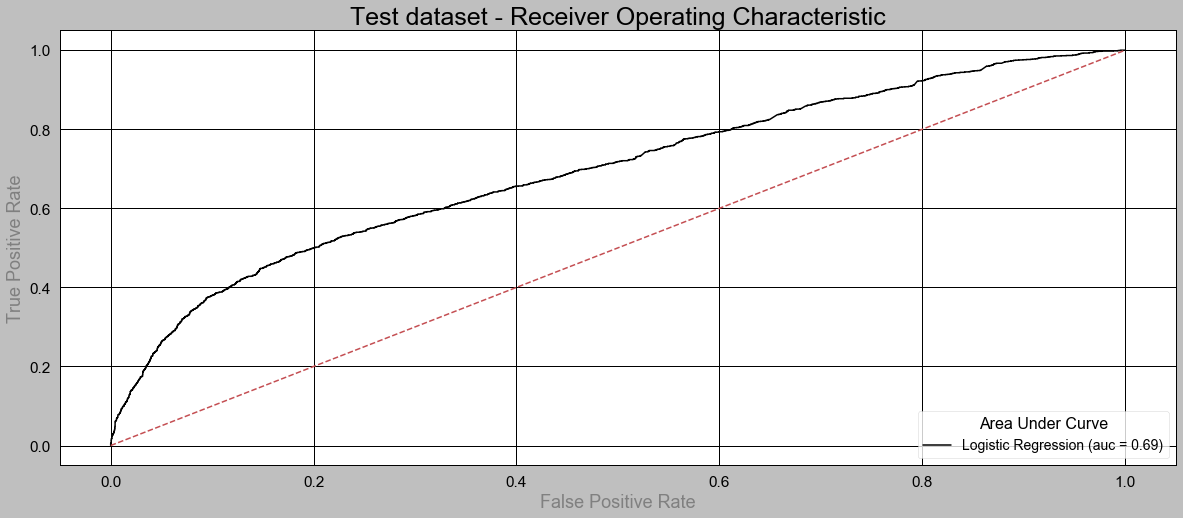

In [102]:
#Activate function to build ROC curve
plt.style.use("grayscale")
plt.figure(figsize=(20,8))
roc_plot(logistic_regression_3, X_test_model_3[:, feat_cols2], y_test_model_3, kind_dataset="test")

plt.show()

In [103]:
#Calculation of area under the ROC curve and Gini Index
y_pred_proba_model_3 = logistic_regression_3.predict_proba(X_test_model_3[:, feat_cols2])[::,1]
AUC_model_3 = round(roc_auc_score(y_test_model_3, y_pred_proba_model_3),2)
accuracy_test_model_3 = accuracy_score(y_test_model_3, predictions_model_2)
print("AUC (Area under the curve) is:", AUC_model_3)
print("Gini:", round(2*AUC_model_3-1,2))
print("Accuracy:", round(accuracy_test_model_3,2))

AUC (Area under the curve) is: 0.69
Gini: 0.38
Accuracy: 0.73


### Comparison of results on test and train datasets

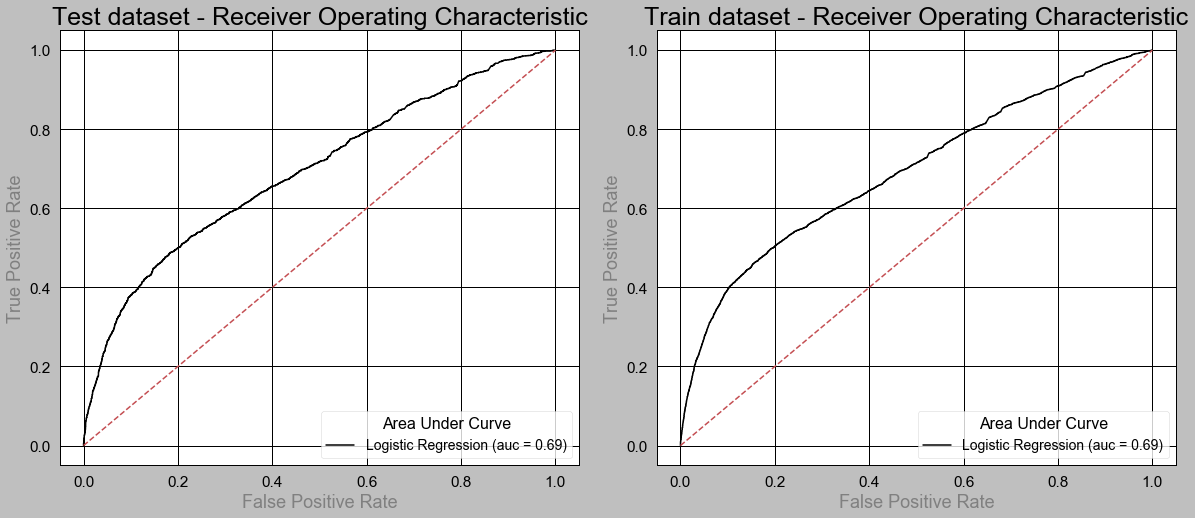

In [104]:
#ROC curves plots for test and train dataset
plt.style.use("grayscale")
plt.figure(figsize=(20,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None)

plt.subplot(1,2,1)
roc_plot(logistic_regression_3, X_test_model_3[:, feat_cols2], y_test_model_3, kind_dataset="test")

plt.subplot(1,2,2)
roc_plot(logistic_regression_3, X_train_model_3[:, feat_cols2], y_train_model_3, kind_dataset="train")

plt.show()

In [105]:
##Gini and AUC from test and train dataset
pred_test_model_3 = logistic_regression_3.predict_proba(X_test_model_3[:, feat_cols2])[::,1]
AUC_test_model_3 = round(roc_auc_score(y_test_model_3, pred_test_model_3),2)
accuracy_test_model_3 = round(accuracy_score(y_test_model_3, predictions_model_3),2)

pred_train_model_3 = logistic_regression_3.predict_proba(X_train_model_3[:, feat_cols2])[::,1]
AUC_train_model_3 = round(roc_auc_score(y_train_model_3, pred_train_model_3),2)
accuracy_train_model_3 = round(accuracy_score(y_train_model_3, predictions_model_3_training),2)

In [106]:
#Data Frame with comparison of results on test and train datasets
mcomparison_test_train_model_3 =pd.DataFrame({"dataset" : ["test", "train"],
                                              "AUC"     : [AUC_test_model_3, AUC_train_model_3],
                                              "Gini"    : [(2*AUC_test_model_3)-1, (2*AUC_train_model_3)-1],
                                              "Accuracy": [accuracy_test_model_3, accuracy_train_model_3]}).set_index("dataset")
mcomparison_test_train_model_3

,AUC,Gini,Accuracy
dataset,,,
test,0.69,0.38,0.79
train,0.69,0.38,0.80


<font size="4"> Results in both datasets (test and training) are comparable, so there is no overfitting. Furthermore, results are also not really low, so there is also no underfitting of the model.

### Model interpretation

In [107]:
#Coefficients of the third model
print(logistic_regression_3.coef_[0])

[-2.53801475e-01  2.30618649e-01  2.37483298e-01  2.21563772e-01
  1.99646416e-01 -5.16512795e-06 -1.15385759e-06 -6.33110677e-05
 -3.41625193e-05 -6.30169765e-02]


In [108]:
#Variables included in the third model
data.iloc[[0], [1, 3, 4, 6, 7, 8, 16, 17, 20, 21]]

,sex,pay_del_september,pay_del_august,pay_del_june,pay_del_may,pay_del_april,payment_august,payment_july,payment_april,education_1
1,2,2,2,-1,-2,-2,689,0,0,0


<font size ="4">The coefficients in logistic regression are not interpretable. Only one can deduce their signs - negative - negatively affect on probability, positive - positively affect on probability.

### Export of predictions to Excel

In [109]:
#Prediction on the test dataset
percent_prediction_M_3=logistic_regression_3.predict_proba(X_test_model_3[:, feat_cols])[:,:]*100
percent_prediction_M_3=pd.DataFrame(data=percent_prediction_M_3, 
                         columns=["Probability of not default (0)","Probability of default (1)"])
percent_prediction_M_3.head(5).round(2)

,Probability of not default (0),Probability of default (1)
0,0.00,100.00
1,0.19,99.81
2,0.24,99.76
3,0.38,99.62
4,0.16,99.84


In [110]:
#Join prediction to the base dataset
comparison_actual_prediction_M_3 = data.join(percent_prediction_M_3).round(2)
comparison_actual_prediction_M_3[["default", "Probability of not default (0)", "Probability of default (1)"]].head(10)

,default,Probability of not default (0),Probability of default (1)
1,1,0.19,99.81
2,1,0.24,99.76
3,0,0.38,99.62
4,0,0.16,99.84
5,0,0.74,99.26
6,0,0.38,99.62
8,0,0.12,99.88
9,0,0.00,100.00
10,0,0.07,99.93
11,0,0.56,99.44


In [111]:
#Export results to Excel
comparison_actual_prediction_M_3.to_excel("Prediction of the third Credit Scoring model.xlsx",
                                          index=False,
                                          header=True)

# 8. Models comparison

In [112]:
#Data Frame with comparison of results on test and train datasets
models_comparison =pd.DataFrame({"Credit Scoring Model"  : [1, 2, 3],
                                              "AUC"      : [AUC_test_1,
                                                            AUC_test_model_2,
                                                            AUC_test_model_3],
                                              "Gini"     : [gini_test_1,
                                                            (2*AUC_test_model_2)-1,
                                                            (2*AUC_test_model_3)-1],
                                              "Accuracy" : [np.nan,
                                                            accuracy_test_model_2,
                                                            accuracy_test_model_3 ]}).set_index("Credit Scoring Model")
models_comparison.round(2)

,AUC,Gini,Accuracy
Credit Scoring Model,,,
1,0.68,0.36,NaN
2,0.69,0.38,0.81
3,0.69,0.38,0.79


<font size="4">Model 2 presents the best AUC and Gini. Althougth Model 2 has the best Accuracy it is really slight advantage. Accuracy was not calculate for the first model. 

# 9. Conclusions

<font size="4">**General summary** <br>
The main target of this project was to build predictive medels to determine the Probability of Default (PD) of clients hold credit card. This project can be called Credit Scoring, although this case is slightly different from the classic definition. To predict the targer variable 3 Logistic Regression models have been built.<br>

**EDA (Exploratory Data Analysis) summary** <br>
The dataset 30000 observations as well as 24 variables including target variable (default). There were no neither null nor NaN values. Data was analysed mainly in terms of detection of outliers.<br>
<br>
**Modelling summary**<br>
Outliers were removed by z-score method.<br>
Then, dummy coding was used for education as well as martial_status. <br>
Dataset for each model has been divided in the proportion of 70% training dataset and 30% test dataset.<br>
Features for models were selected by 3 different methods: Information Value (IV), Forward selection method and Backward selection method. <br>
Models were evaluated based on: Gini, ROC curve and Accuracy. Then models were interpreted.<br>
No model was overfit or underfit.<br>
Model 2 presents the best results.